# Visualization: Trading Session

In [8]:
%pip install coloredlogs

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.7 MB/s eta 0:00:00
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distut

In [3]:
import pandas as pd
import numpy as np

import altair as alt
import seaborn as sns

### 1. Define parameters and Load model

In [41]:
from trading_bot.agent import Agent

model_name = 'model_dqn_GOOG_50'
test_stock = 'data/NFLX.csv'
window_size = 10
debug = True

agent = Agent(window_size, pretrained=True, model_name=model_name)

2024-01-26 12:21:13 WaideMBP-3.bahnhof.se absl[83734] WARNING At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
2024-01-26 12:21:13 WaideMBP-3.bahnhof.se absl[83734] WARNING `lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.


### 2. Load test data

In [42]:
# read csv into dataframe
df = pd.read_csv(test_stock)
# filter out the desired features
df = df[['Date', 'Adj Close']]
# rename feature column names
df = df.rename(columns={'Adj Close': 'actual', 'Date': 'date'})
# convert dates from object to DateTime type
dates = df['date']
dates = pd.to_datetime(dates, infer_datetime_format=True)
df['date'] = dates

df.head()

/var/folders/mp/xttjghwn76s09xxd4fmlxzfm0000gn/T/ipykernel_83734/308547104.py:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dates = pd.to_datetime(dates, infer_datetime_format=True)


,date,actual
0,2010-08-12,19.007143
1,2010-08-13,18.894285
2,2010-08-16,19.602858
3,2010-08-17,18.995714
4,2010-08-18,17.957144


### 3. Running Eval

In [43]:
import logging
import coloredlogs

from trading_bot.utils import show_eval_result, switch_k_backend_device, get_stock_data
from trading_bot.methods import evaluate_model

coloredlogs.install(level='DEBUG')
switch_k_backend_device()

test_data = get_stock_data(test_stock)
initial_offset = test_data[1] - test_data[0]

test_result, history = evaluate_model(agent, test_data, window_size, debug)
show_eval_result(model_name, test_result, initial_offset)

2024-01-26 12:21:19 WaideMBP-3.bahnhof.se root[83734] DEBUG switching to TensorFlow for CPU
2024-01-26 12:21:19 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $19.01


1/1 [==============================] - 0s 102ms/step


2024-01-26 12:21:19 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $18.89 | Position: -$0.11


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:19 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $17.96


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:19 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $18.32 | Position: +$0.36


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:20 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $17.59


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:20 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $17.93 | Position: +$0.35


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $22.09


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $21.83


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $22.25 | Position: +$0.16


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $21.86


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $21.33


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $21.88 | Position: +$0.05


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $24.67 | Position: +$2.81


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $24.01 | Position: +$2.68


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:22 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $25.02


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:22 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $24.71


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:22 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $24.04 | Position: -$0.98


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:22 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $23.63 | Position: -$1.09


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:22 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $26.49


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:22 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $27.64 | Position: +$1.15


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:22 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $25.49


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:22 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $25.50 | Position: +$0.01


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $25.44


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $26.61 | Position: +$1.17


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $25.72


1/1 [==============================] - 0s 13ms/step


2024-01-26 12:21:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $26.24 | Position: +$0.52


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $25.10


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $25.49 | Position: +$0.39


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $25.43


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $25.61 | Position: +$0.19


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $30.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $30.21 | Position: +$0.03


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $30.17


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $30.74 | Position: +$0.57


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $29.63


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $27.92 | Position: -$1.71


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $28.74


1/1 [==============================] - 0s 13ms/step


2024-01-26 12:21:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $31.02 | Position: +$2.27


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $30.41


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $31.63 | Position: +$1.22


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $34.28


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:21:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $33.42


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $33.55 | Position: -$0.73


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $32.59 | Position: -$0.83


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $33.64


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $33.33 | Position: -$0.31


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $33.87


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $33.85


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $34.65 | Position: +$0.78


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $34.68 | Position: +$0.83


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $37.67


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $37.47 | Position: -$0.20


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $35.61


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $35.10 | Position: -$0.52


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $37.53


1/1 [==============================] - 0s 13ms/step


2024-01-26 12:21:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $38.28 | Position: +$0.76


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $39.86


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $41.04 | Position: +$1.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $39.40


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $39.51 | Position: +$0.11


1/1 [==============================] - 0s 13ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $38.09


1/1 [==============================] - 0s 13ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $38.00 | Position: -$0.09


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $37.63


1/1 [==============================] - 0s 13ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $36.74 | Position: -$0.88


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $34.44


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $32.38


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $33.97 | Position: -$0.47


1/1 [==============================] - 0s 13ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $33.20 | Position: +$0.83


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $33.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $31.07 | Position: -$2.11


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $29.32


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $31.36 | Position: +$2.05


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $30.83


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $31.70 | Position: +$0.87


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $33.32


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $30.44 | Position: -$2.88


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $24.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $22.17


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $20.54 | Position: -$3.64


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $18.58


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $18.36


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $18.36


1/1 [==============================] - 0s 18ms/step


2024-01-26 12:21:31 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $18.48 | Position: -$3.69


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:31 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $18.89 | Position: +$0.31


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:31 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $18.21 | Position: -$0.14


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:31 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $18.16 | Position: -$0.20


1/1 [==============================] - 0s 18ms/step


2024-01-26 12:21:31 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $15.95


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:31 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $15.52 | Position: -$0.42


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $11.05


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $11.34 | Position: +$0.29


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $11.73


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $11.44 | Position: -$0.28


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $9.22


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $9.60 | Position: +$0.38


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:33 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $10.30


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:33 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $10.15 | Position: -$0.15


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:33 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $10.09


1/1 [==============================] - 0s 19ms/step


2024-01-26 12:21:33 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $9.89


1/1 [==============================] - 0s 45ms/step


2024-01-26 12:21:33 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $9.90 | Position: -$0.19


1/1 [==============================] - 0s 20ms/step


2024-01-26 12:21:33 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $9.90 | Position: +$0.01


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:34 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $13.24


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:34 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $13.58 | Position: +$0.34


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:34 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $17.92


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:34 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $17.17 | Position: -$0.75


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $16.90


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $17.58 | Position: +$0.68


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $16.06


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $16.14 | Position: +$0.08


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $15.83


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $15.30


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $15.03 | Position: -$0.80


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $15.44 | Position: +$0.13


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $15.71


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $16.33


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $16.43 | Position: +$0.72


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $17.16 | Position: +$0.82


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $15.16


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:21:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $14.55


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $12.53


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $12.34 | Position: -$2.82


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $12.15 | Position: -$2.40


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $11.96 | Position: -$0.56


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $10.45


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $10.49 | Position: +$0.04


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $11.07


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $10.60


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $10.28


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $9.99 | Position: -$1.07


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $10.25 | Position: -$0.35


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $9.67 | Position: -$0.61


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $9.06


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $8.99 | Position: -$0.07


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $9.00


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $8.98 | Position: -$0.03


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $9.41


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:21:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $9.69


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $9.58 | Position: +$0.17


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $9.54


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $9.50 | Position: -$0.20


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $9.62 | Position: +$0.08


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $11.42


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $11.48 | Position: +$0.06


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $8.27


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $8.26


1/1 [==============================] - 0s 22ms/step


2024-01-26 12:21:40 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $8.27 | Position: +$0.00


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:40 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $8.56 | Position: +$0.30


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:40 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $8.56


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:40 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $8.82


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:40 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $9.04 | Position: +$0.48


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:40 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $9.19 | Position: +$0.36


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:40 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $8.29


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:41 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $8.65 | Position: +$0.36


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:41 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $8.15


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:41 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $8.01


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:41 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $8.15 | Position: +$0.00


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:41 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $8.39 | Position: +$0.38


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:41 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $7.78


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:41 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $8.01 | Position: +$0.23


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:42 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $9.70


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:42 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $9.75 | Position: +$0.05


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:42 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $8.59


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:42 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $8.79


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:42 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $9.94 | Position: +$1.35


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:21:42 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $11.32 | Position: +$2.53


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:42 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $11.18


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:42 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $10.91


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:21:42 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $11.10 | Position: -$0.08


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:42 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $10.85 | Position: -$0.06


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:42 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $11.40


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:42 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $11.64 | Position: +$0.24


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:42 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $11.62


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:42 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $11.77 | Position: +$0.15


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:43 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $12.30


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:43 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $12.96 | Position: +$0.66


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:43 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $13.66


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:43 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $13.43 | Position: -$0.24


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:44 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $13.97


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:44 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $14.75 | Position: +$0.78


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:44 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $24.16


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:44 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $23.96


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:44 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $23.61 | Position: -$0.55


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:44 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $23.54 | Position: -$0.41


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:44 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $25.85


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:44 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $25.41 | Position: -$0.44


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:45 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $26.74


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:45 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $25.69 | Position: -$1.04


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:45 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $25.89


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:45 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $25.96


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:45 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $26.13 | Position: +$0.25


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:45 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $25.94 | Position: -$0.02


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:45 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $26.91


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:45 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $26.41


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:45 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $26.51 | Position: -$0.40


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:45 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $25.91 | Position: -$0.50


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:46 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $27.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:46 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $27.04


1/1 [==============================] - 0s 13ms/step


2024-01-26 12:21:46 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $26.06


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:46 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $25.24


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:46 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $24.25 | Position: -$2.93


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:46 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $23.81 | Position: -$3.23


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:46 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $23.52 | Position: -$2.54


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:46 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $23.29 | Position: -$1.95


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:46 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $25.12


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:46 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $24.19


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:46 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $23.40


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:46 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $23.34 | Position: -$1.78


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:46 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $24.91 | Position: +$0.72


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:46 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $31.00 | Position: +$7.60


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:47 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $29.46


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:47 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $29.80 | Position: +$0.34


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:47 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $34.14


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:47 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $34.22 | Position: +$0.08


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:47 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $30.60


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:47 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $30.76 | Position: +$0.16


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:48 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $31.11


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:48 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $31.46


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:48 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $31.56 | Position: +$0.46


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:48 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $30.64 | Position: -$0.82


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:48 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $33.19


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:48 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $31.93 | Position: -$1.26


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:48 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $34.88


1/1 [==============================] - 0s 17ms/step


2024-01-26 12:21:48 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $36.75 | Position: +$1.87


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:49 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $37.42


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:49 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $35.75 | Position: -$1.67


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:49 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $34.47


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:49 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $35.25 | Position: +$0.78


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:49 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $36.26


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:49 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $36.56 | Position: +$0.29


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:49 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $35.77


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:49 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $36.11 | Position: +$0.34


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:50 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $42.16


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:50 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $41.65 | Position: -$0.51


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:50 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $43.78


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:50 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $43.88


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:51 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $44.79 | Position: +$1.00


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:51 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $44.63


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:51 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $44.17


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:51 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $46.37 | Position: +$2.50


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:51 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $47.25 | Position: +$2.62


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:51 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $45.96 | Position: +$1.79


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:51 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $41.20


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:51 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $43.43 | Position: +$2.22


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:51 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $42.98


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:51 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $46.34 | Position: +$3.36


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:51 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $45.96


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:51 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $46.13 | Position: +$0.17


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:51 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $44.86


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:51 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $46.76 | Position: +$1.90


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:52 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $46.69


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:52 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $47.84 | Position: +$1.15


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:52 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $48.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:52 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $48.50 | Position: +$0.32


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:52 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $51.85


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:52 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $50.90 | Position: -$0.95


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:53 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $52.33


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:53 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $53.55 | Position: +$1.22


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:53 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $52.50


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:53 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $52.43 | Position: -$0.07


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:54 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $57.77


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:54 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $57.99 | Position: +$0.22


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:54 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $57.77


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:54 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $58.27 | Position: +$0.50


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:54 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $62.00


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:54 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $61.28 | Position: -$0.72


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:21:55 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $64.11


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:21:55 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $64.60 | Position: +$0.49


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:21:55 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $63.66


1/1 [==============================] - 0s 17ms/step


2024-01-26 12:21:55 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $63.66 | Position: -$0.01


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:55 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $52.03


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $51.27


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $50.29


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $52.10


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $51.84 | Position: -$0.19


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $50.67 | Position: -$0.60


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $48.19


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $48.29 | Position: -$2.00


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $49.84 | Position: -$2.26


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $50.43 | Position: +$2.25


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $47.82


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $47.37 | Position: -$0.45


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $47.34


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $49.39 | Position: +$2.05


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $49.15


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $46.01 | Position: -$3.14


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $48.66


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:56 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $49.20 | Position: +$0.53


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:57 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $45.95


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:57 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $46.94 | Position: +$0.98


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:57 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $60.44


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:57 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $61.18 | Position: +$0.74


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:58 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $63.06


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:58 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $62.88 | Position: -$0.17


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:58 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $64.16


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:58 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $63.49 | Position: -$0.66


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:58 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $63.45


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:59 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $64.56 | Position: +$1.11


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:21:59 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $61.58


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:59 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $61.13


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:21:59 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $60.77 | Position: -$0.82


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:59 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $60.27 | Position: -$0.86


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:59 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $60.67


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:59 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $60.61 | Position: -$0.05


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:21:59 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $60.39


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:21:59 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $60.41 | Position: +$0.02


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:00 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $67.81


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:00 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $67.89 | Position: +$0.07


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:00 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $68.43


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:00 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $69.20 | Position: +$0.77


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $62.69


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $64.28


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $65.65 | Position: +$2.96


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $66.21 | Position: +$1.93


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $65.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $66.69 | Position: +$1.52


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $62.65


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $64.16 | Position: +$1.51


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $64.08


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $51.67


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $51.01


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $51.32


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $52.28 | Position: -$11.80


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $53.52 | Position: +$1.85


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $54.72 | Position: +$3.71


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:01 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $55.00 | Position: +$3.69


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:02 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $54.68


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:02 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $54.34 | Position: -$0.34


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:02 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $54.65


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:02 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $54.84 | Position: +$0.19


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:02 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $54.45


1/1 [==============================] - 0s 17ms/step


2024-01-26 12:22:02 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $54.43


1/1 [==============================] - 0s 17ms/step


2024-01-26 12:22:02 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $51.87 | Position: -$2.58


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:02 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $52.59 | Position: -$1.84


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:02 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $50.92


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:02 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $49.86


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:02 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $50.17 | Position: -$0.76


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:02 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $49.51 | Position: -$0.34


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:03 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $45.21


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:03 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $47.66 | Position: +$2.46


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:03 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $47.31


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:03 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $46.50


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:03 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $46.74 | Position: -$0.57


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:03 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $47.78 | Position: +$1.28


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:04 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $46.32


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:04 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $46.25 | Position: -$0.07


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:04 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $65.25


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:04 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $66.59 | Position: +$1.34


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:05 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $67.41


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:05 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $67.84 | Position: +$0.43


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:05 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $63.66


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:05 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $62.15 | Position: -$1.51


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:05 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $60.28


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:05 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $59.79 | Position: -$0.49


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:06 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $59.25


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:06 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $60.37 | Position: +$1.11


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:06 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $62.79


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:06 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $64.94 | Position: +$2.15


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:06 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $79.67


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:06 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $79.87 | Position: +$0.20


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:07 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $82.87


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:07 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $83.84 | Position: +$0.96


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:08 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $94.27


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:08 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $94.74 | Position: +$0.47


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:08 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $93.87


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:08 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $96.41 | Position: +$2.54


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:08 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $93.09


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:08 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $92.23 | Position: -$0.86


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:08 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $93.85


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:08 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $93.64


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:08 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $94.04 | Position: +$0.20


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:08 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $94.57


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:08 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $94.09 | Position: +$0.46


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:08 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $93.51 | Position: -$1.06


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:09 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $100.37


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:09 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $98.13 | Position: -$2.24


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:09 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $109.34


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:09 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $106.43 | Position: -$2.91


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:09 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $122.74


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:09 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $120.51 | Position: -$2.23


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $123.39


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $125.36 | Position: +$1.97


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $103.96


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $96.88


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $101.52


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $110.13


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $117.66 | Position: +$13.70


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $117.63 | Position: +$20.75


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $115.03


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $105.79


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $105.44


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $101.06 | Position: -$0.46


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $98.79 | Position: -$11.34


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $94.95


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $99.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $99.48


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $97.51


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $95.69


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $99.16


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $104.08 | Position: -$10.95


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $104.21


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:10 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $102.62


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $98.47


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $98.07 | Position: -$7.72


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $103.76


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $102.24 | Position: -$3.20


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $99.47


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $98.35 | Position: +$3.40


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $103.26


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $105.98


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $106.11 | Position: +$6.93


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $111.25 | Position: +$11.77


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $108.33 | Position: +$10.82


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $108.10 | Position: +$12.41


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $114.93 | Position: +$15.77


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $113.33 | Position: +$9.12


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $113.45 | Position: +$10.83


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $109.73 | Position: +$11.26


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $110.23 | Position: +$6.47


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $101.09


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $98.99


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $101.69


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $98.99 | Position: -$0.48


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $100.04 | Position: -$3.22


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:11 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $103.04 | Position: -$2.94


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $103.07 | Position: +$1.98


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $105.80 | Position: +$6.81


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $105.12 | Position: +$3.43


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $107.64


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $109.74 | Position: +$2.10


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $114.05


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $113.50 | Position: -$0.55


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $112.86


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $108.92 | Position: -$3.94


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $103.65


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $111.35 | Position: +$7.70


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $125.44


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $123.33 | Position: -$2.11


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $125.37


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:12 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $128.93 | Position: +$3.56


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $130.93


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $125.36 | Position: -$5.57


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $122.91


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $118.91 | Position: -$4.00


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $118.60


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $122.64


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $122.51


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $118.02


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $116.63 | Position: -$1.97


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $116.24


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $118.16 | Position: -$4.48


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $117.33 | Position: -$5.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $117.11


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $119.12


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $116.71


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $114.38


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $109.96


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $107.66


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $117.68


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:13 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $114.56


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $114.97


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $116.58 | Position: -$1.44


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $106.56


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $104.04


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $107.74


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $102.35 | Position: -$13.89


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $100.72 | Position: -$16.39


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $99.12


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $97.83 | Position: -$21.29


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $91.15 | Position: -$25.56


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $94.41 | Position: -$19.97


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $91.84


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $94.09


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $91.49


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $90.74


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $89.71 | Position: -$20.25


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $82.79


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $83.32


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $86.13


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $88.45 | Position: -$19.21


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $86.35 | Position: -$31.33


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $87.40 | Position: -$27.16


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:14 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $89.05


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $94.76


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $90.49 | Position: -$24.48


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $89.23


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $91.93 | Position: -$14.63


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $89.12 | Position: -$14.92


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $91.61 | Position: -$16.13


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $94.53


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $94.79 | Position: -$4.33


1/1 [==============================] - 0s 18ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $93.41 | Position: +$1.57


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $98.30


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $97.61


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $97.93 | Position: +$3.84


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $101.58 | Position: +$10.09


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $95.49 | Position: +$4.75


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $96.23 | Position: +$13.44


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $98.00


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $97.36 | Position: +$14.04


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $97.66 | Position: +$11.53


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $98.13 | Position: +$9.08


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $97.86 | Position: +$3.10


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $99.35 | Position: +$10.12


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $99.72 | Position: +$5.19


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $101.12 | Position: +$2.82


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $101.06 | Position: +$3.45


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $99.84 | Position: +$1.84


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:15 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $99.59


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $98.36 | Position: -$1.23


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $102.19


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $102.23


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $105.70


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $104.35 | Position: +$2.16


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $104.94 | Position: +$2.71


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $104.83 | Position: -$0.87


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $103.81


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $102.68


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $106.98 | Position: +$3.17


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $109.65 | Position: +$6.97


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $94.34


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $96.77 | Position: +$2.43


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $93.56


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $92.43


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $91.04 | Position: -$2.52


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:16 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $90.28 | Position: -$2.15


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:17 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $90.03


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:17 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $93.11


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:17 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $91.54


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:17 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $90.79 | Position: +$0.76


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:17 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $89.37 | Position: -$3.74


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:17 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $90.54 | Position: -$1.00


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:17 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $89.55


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:17 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $92.49


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:17 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $94.89 | Position: +$5.34


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:17 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $97.89 | Position: +$5.40


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:18 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $97.86


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:18 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $97.09 | Position: -$0.77


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:18 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $93.75


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:18 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $93.85 | Position: +$0.10


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:18 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $94.12


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:18 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $94.29 | Position: +$0.17


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:18 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $95.44


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:18 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $94.45 | Position: -$0.99


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:18 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $87.97


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:18 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $91.06 | Position: +$3.09


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:18 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $95.97


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:19 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $96.43 | Position: +$0.46


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:19 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $98.02


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:19 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $98.39 | Position: +$0.37


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:19 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $95.11


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:19 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $93.99


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:19 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $93.93


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:19 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $95.89 | Position: +$0.78


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:19 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $96.59 | Position: +$2.60


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:19 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $95.31 | Position: +$1.38


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:20 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $95.26


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:20 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $95.94 | Position: +$0.68


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:20 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $95.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:20 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $97.32 | Position: +$2.14


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:20 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $97.30


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:20 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $97.45 | Position: +$0.15


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:20 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $99.48


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:20 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $98.06 | Position: -$1.42


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $104.82


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $103.33


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $100.59 | Position: -$4.23


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $99.50


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $100.23


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $101.47 | Position: -$1.86


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $99.80 | Position: +$0.30


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $118.79 | Position: +$18.56


1/1 [==============================] - 0s 17ms/step


2024-01-26 12:22:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $121.87


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $123.35


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $127.50 | Position: +$5.63


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:21 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $127.33 | Position: +$3.98


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:22 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $115.42


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:22 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $114.78 | Position: -$0.64


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:22 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $113.59


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:22 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $115.19 | Position: +$1.60


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:22 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $116.93


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:22 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $117.51 | Position: +$0.58


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $122.88


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $122.83


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $123.78 | Position: +$0.90


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $123.44 | Position: +$0.61


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $125.45


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $125.12 | Position: -$0.33


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $125.59


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $128.35 | Position: +$2.76


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:23 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $129.89


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $130.50 | Position: +$0.61


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $137.39


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $140.11 | Position: +$2.72


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $142.45


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $141.22 | Position: -$1.23


1/1 [==============================] - 0s 13ms/step


2024-01-26 12:22:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $140.97


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $144.00 | Position: +$3.03


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $144.82


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $143.20 | Position: -$1.62


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $140.82


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:24 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $142.27 | Position: +$1.45


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $143.25


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $143.41 | Position: +$0.16


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $142.13


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $142.65 | Position: +$0.52


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $141.43


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $140.32 | Position: -$1.11


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $145.83


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:25 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $142.42 | Position: -$3.41


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $144.06


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $145.17 | Position: +$1.11


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $146.47


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $148.06 | Position: +$1.59


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $146.92


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $145.50 | Position: -$1.42


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $139.76


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $141.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $142.87 | Position: +$3.11


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $143.83 | Position: +$2.65


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $153.08


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:26 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $155.35 | Position: +$2.27


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $156.38


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $157.46 | Position: +$1.08


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $153.20


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $155.70 | Position: +$2.50


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $157.75


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $163.05 | Position: +$5.30


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $165.17


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:27 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $165.61 | Position: +$0.44


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $151.44


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $152.72 | Position: +$1.28


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $152.20


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $151.76


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $152.38 | Position: +$0.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $153.40 | Position: +$1.64


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $158.02


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $157.50 | Position: -$0.52


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $147.61


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $146.25 | Position: -$1.36


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $150.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $152.67


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $154.33 | Position: +$4.15


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:28 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $158.75 | Position: +$6.08


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $186.97


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $189.08 | Position: +$2.11


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $182.03


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $180.74 | Position: -$1.29


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $179.23


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $180.27 | Position: +$1.04


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $178.36


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $175.78


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:29 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $169.14


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $171.00


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $168.50


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $169.98 | Position: -$8.38


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $166.09


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $166.54


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $166.76


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $169.34


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $169.06 | Position: -$6.72


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $168.13 | Position: -$1.01


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $165.95 | Position: -$5.05


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $168.81 | Position: +$0.31


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $174.69 | Position: +$8.60


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $174.71 | Position: +$8.17


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $174.74 | Position: +$7.98


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:30 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $174.52 | Position: +$5.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:31 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $181.97


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:31 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $180.70


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:31 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $181.35 | Position: -$0.62


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:31 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $177.01 | Position: -$3.69


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:31 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $179.19


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:31 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $194.39 | Position: +$15.20


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:31 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $199.49


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:31 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $202.68 | Position: +$3.19


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $193.77


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $195.21


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $199.54 | Position: +$5.77


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $198.37


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $196.43 | Position: +$1.22


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $198.00 | Position: -$0.37


1/1 [==============================] - 0s 17ms/step


2024-01-26 12:22:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $200.01


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $200.13 | Position: +$0.12


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $193.90


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $192.02 | Position: -$1.88


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $196.23


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:32 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $196.32 | Position: +$0.09


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:33 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $186.82


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:33 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $184.21 | Position: -$2.61


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:33 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $186.22


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:33 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $185.73


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:33 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $187.86 | Position: +$1.64


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:33 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $189.56 | Position: +$3.83


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:33 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $186.24


1/1 [==============================] - 0s 17ms/step


2024-01-26 12:22:33 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $192.71 | Position: +$6.47


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:34 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $254.26


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:34 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $265.72 | Position: +$11.46


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:34 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $264.56


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $250.10


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $249.47


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $257.95 | Position: -$6.61


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $258.27


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $266.00 | Position: +$15.90


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $280.27 | Position: +$30.80


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $278.52 | Position: +$20.25


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $321.30


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:35 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $315.88 | Position: -$5.42


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $313.48


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $317.50


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $316.48 | Position: +$3.00


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $300.94


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $320.35


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $285.77


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $280.29 | Position: -$37.21


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $288.94


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $293.97 | Position: -$6.97


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $288.85


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $289.93 | Position: -$30.42


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $303.67 | Position: +$17.90


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $309.25 | Position: +$20.31


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $311.65 | Position: +$22.80


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:36 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $332.70


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $318.69


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $307.02


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $305.76


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $313.98 | Position: -$18.72


1/1 [==============================] - 0s 16ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $311.76


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $312.46 | Position: -$6.23


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $313.30


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $313.36


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $311.69


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $320.09 | Position: +$13.07


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $326.26 | Position: +$20.50


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $326.89 | Position: +$15.13


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $330.30 | Position: +$17.00


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $329.60 | Position: +$16.24


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $326.46 | Position: +$14.77


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $324.18


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:37 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $331.82 | Position: +$7.64


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $353.54


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $351.60 | Position: -$1.94


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $363.83


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $379.93


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $392.87 | Position: +$29.04


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $391.98 | Position: +$12.05


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $384.48


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $399.39 | Position: +$14.91


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $390.39


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $395.42 | Position: +$5.03


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:38 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $391.43


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $398.18


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $390.52


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $398.39 | Position: +$6.96


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $408.25 | Position: +$10.07


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $418.97 | Position: +$28.45


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $395.80


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $400.48 | Position: +$4.68


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $361.05


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $357.32


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $362.87


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $363.09


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $355.21


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $337.45


1/1 [==============================] - 0s 17ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $338.38 | Position: -$22.67


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $344.50 | Position: -$12.82


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:39 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $343.09


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:40 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $350.92


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:40 WaideMBP-3.bahnhof.se root[83734] DEBUG Sell at: $351.83 | Position: -$11.04


1/1 [==============================] - 0s 14ms/step


2024-01-26 12:22:40 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $347.61


1/1 [==============================] - 0s 15ms/step


2024-01-26 12:22:40 WaideMBP-3.bahnhof.se root[83734] DEBUG Buy at: $349.36
2024-01-26 12:22:40 WaideMBP-3.bahnhof.se root[83734] INFO model_dqn_GOOG_50: +$249.86



### 4. Visualize

In [44]:
def visualize(df, history, title="trading session"):
    # add history to dataframe
    position = [history[0][0]] + [x[0] for x in history]
    actions = ['HOLD'] + [x[1] for x in history]
    df['position'] = position
    df['action'] = actions
    
    # specify y-axis scale for stock prices
    scale = alt.Scale(domain=(min(min(df['actual']), min(df['position'])) - 50, max(max(df['actual']), max(df['position'])) + 50), clamp=True)
    
    # plot a line chart for stock positions
    actual = alt.Chart(df).mark_line(
        color='green',
        opacity=0.5
    ).encode(
        x='date:T',
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale)
    ).interactive(
        bind_y=False
    )
    
    # plot the BUY and SELL actions as points
    points = alt.Chart(df).transform_filter(
        alt.datum.action != 'HOLD'
    ).mark_point(
        filled=True
    ).encode(
        x=alt.X('date:T', axis=alt.Axis(title='Date')),
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale),
        color='action'
    ).interactive(bind_y=False)

    # merge the two charts
    chart = alt.layer(actual, points, title=title).properties(height=300, width=1000)
    
    return chart

In [45]:
chart = visualize(df, history, title=test_stock)
chart

alt.LayerChart(...)

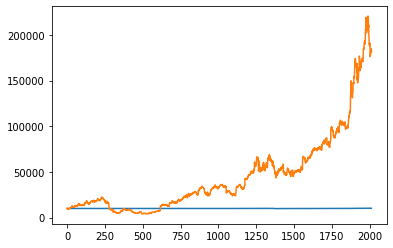

77 77


In [47]:
import matplotlib.pyplot as plt
flow_plot = []
flow = 10000
pos = 0
for amt,direction in history:
    if direction=="BUY":
        flow-=amt
        pos +=1
    elif direction == "SELL":
        flow+=amt
        pos -=1
    flow_plot.append(pos*amt+flow)
plt.plot(flow_plot)
plt.plot(df["actual"]/df["actual"][0]*10000)
plt.show()
print(long,short)

In [39]:
df["actual"][0]

17.6